# 【課題1】練習のために特徴量とカテゴリを選択
#### 選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

#### virgicolorとvirginica
#### sepal_lengthとpetal_length

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X_original = pd.DataFrame(iris.data, columns=iris.feature_names)
y_original = pd.DataFrame(iris.target, columns=["species"])
X_y_original = pd.concat([X_original.loc[:,['sepal length (cm)','petal length (cm)']],y_original], axis = 1)

In [2]:
X_y = X_y_original[X_y_original['species'] > 0]

In [3]:
X_y.head()

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# 【問題2】データの分析
#### まずはデータの分析を行いますが、これはWeek3の課題1で行いました。
#### その際出力した散布図行列を見ることで、
#### 先ほどの18通りそれぞれの散布図も確認できます。
#### sepal_lengthとpetal_lengthを使い、
#### virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

#### ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

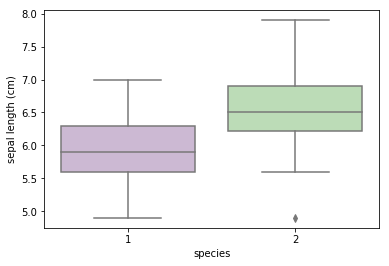

In [4]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x='species',y='sepal length (cm)', data=X_y, palette='PRGn')

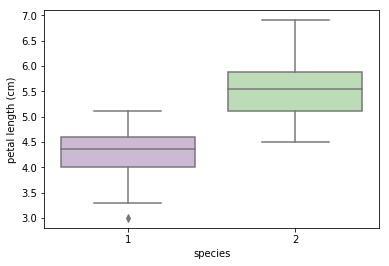

In [5]:
sns.boxplot(x='species',y='petal length (cm)', data=X_y, palette='PRGn')

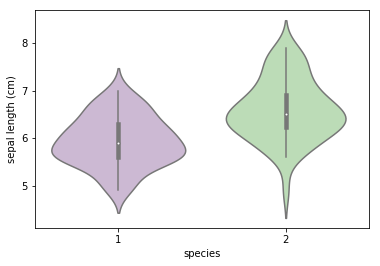

In [6]:
sns.violinplot(x='species',y='sepal length (cm)', data=X_y, palette='PRGn')

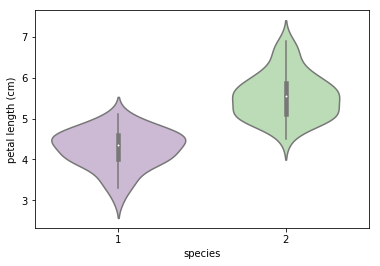

In [7]:
sns.violinplot(x='species',y='petal length (cm)', data=X_y, palette='PRGn')

# 【問題2】前処理・学習用データと検証用データの分割
#### 前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行います。
#### 今回は学習用データ75%、検証用データ25%として分割してください。

#### データの分析まではPandasのDataFrame型を使用してきました。
#### しかし、scikit-learnはNumPyのndarray型を想定して作られています。
#### そのため、この段階でndarrayへの変換を行いましょう。
#### 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

In [8]:
from sklearn.model_selection import train_test_split
X_y_train,X_y_test = train_test_split(X_y,test_size=0.25,random_state=0)

#学習用
X = X_y_train.iloc[:,0:2].values
y = X_y_train.iloc[:,2].values
#検証用
X_test = X_y_test.iloc[:,0:2].values
y_test = X_y_test.iloc[:,2].values
X

array([[5.1, 3. ],
       [6.3, 4.7],
       [5.9, 5.1],
       [6.4, 5.6],
       [6.2, 4.8],
       [6.5, 5.1],
       [7.4, 6.1],
       [6.7, 5.6],
       [7.7, 6.9],
       [5.8, 5.1],
       [6.7, 5. ],
       [6.2, 4.5],
       [4.9, 4.5],
       [5.7, 5. ],
       [6.7, 5.7],
       [6.4, 4.5],
       [6.4, 5.3],
       [5.8, 4. ],
       [6.1, 4.6],
       [6.5, 4.6],
       [6.7, 4.4],
       [5.8, 4.1],
       [5.5, 4.4],
       [5.6, 4.1],
       [5.7, 4.5],
       [6.9, 5.1],
       [7.2, 6.1],
       [7. , 4.7],
       [5.4, 4.5],
       [6. , 4.5],
       [6.3, 6. ],
       [5.9, 4.2],
       [6. , 4.5],
       [6.1, 4.7],
       [7.1, 5.9],
       [5. , 3.5],
       [5.5, 3.7],
       [6.5, 5.5],
       [7.3, 6.3],
       [7.2, 5.8],
       [7.7, 6.1],
       [5.8, 3.9],
       [6.1, 5.6],
       [5.6, 3.6],
       [6.9, 5.4],
       [5.6, 3.9],
       [5.7, 3.5],
       [5.7, 4.1],
       [6.5, 5.2],
       [6.2, 5.4],
       [6. , 5. ],
       [5.9, 4.8],
       [6.7,

# 【問題3】前処理・標準化
#### 分類精度をあげるための加工を行います。
#### 手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。
#### 標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

#### 注意点

#### 標準化は学習用のデータでfitを行い、学習用、検証用双方のデータにtransformを行います。
#### 検証用データは学習の段階には存在しない未知のデータの代わりなので、
#### 標準化のための平均や標準偏差の計算に使ってはいけません。

In [9]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X)
X_train_std = scl.transform(X)
print(X_train_std)

[[-1.77029021 -2.29778941]
 [ 0.03817879 -0.24187257]
 [-0.56464421  0.24187257]
 [ 0.18888454  0.84655399]
 [-0.11252696 -0.12093628]
 [ 0.33959029  0.24187257]
 [ 1.69594204  1.45123542]
 [ 0.64100179  0.84655399]
 [ 2.14805929  2.4187257 ]
 [-0.71534996  0.24187257]
 [ 0.64100179  0.12093628]
 [-0.11252696 -0.48374514]
 [-2.07170171 -0.48374514]
 [-0.86605571  0.12093628]
 [ 0.64100179  0.96749028]
 [ 0.18888454 -0.48374514]
 [ 0.18888454  0.48374514]
 [-0.71534996 -1.08842656]
 [-0.26323271 -0.36280885]
 [ 0.33959029 -0.36280885]
 [ 0.64100179 -0.60468142]
 [-0.71534996 -0.96749028]
 [-1.16746721 -0.60468142]
 [-1.01676146 -0.96749028]
 [-0.86605571 -0.48374514]
 [ 0.94241329  0.24187257]
 [ 1.39453054  1.45123542]
 [ 1.09311904 -0.24187257]
 [-1.31817296 -0.48374514]
 [-0.41393846 -0.48374514]
 [ 0.03817879  1.33029913]
 [-0.56464421 -0.84655399]
 [-0.41393846 -0.48374514]
 [-0.26323271 -0.24187257]
 [ 1.24382479  1.20936285]
 [-1.92099596 -1.69310799]
 [-1.16746721 -1.45123542]
 

# 【問題4】学習と推定
#### 最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは学習用データです。

#### sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation

#### 学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

#### パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [10]:
from sklearn.neighbors import KNeighborsClassifier


#検証用
X_test = X_y_test.iloc[:,0:2].values
y_test = X_y_test.iloc[:,2].values

#検証用の標準化
X_test_std = scl.transform(X_test)

[1] score: 0.84
[2] score: 0.88
[3] score: 0.92
[4] score: 0.92
[5] score: 0.88
[6] score: 0.92
[7] score: 0.92
[8] score: 0.92
[9] score: 0.92
[10] score: 0.92
[11] score: 0.92
[12] score: 0.92
[13] score: 0.92
[14] score: 0.88
[15] score: 0.84
[16] score: 0.84
[17] score: 0.84
[18] score: 0.84
[19] score: 0.80
[20] score: 0.84
[21] score: 0.80
[22] score: 0.80
[23] score: 0.80
[24] score: 0.80
[25] score: 0.80
[26] score: 0.84
[27] score: 0.80
[28] score: 0.80
[29] score: 0.80
[30] score: 0.80


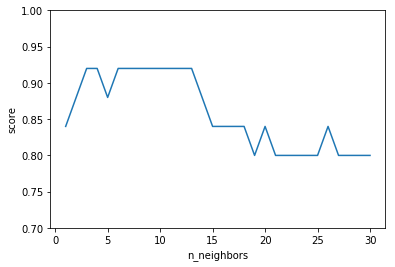

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
list_nn = []
list_score = []
for k in range(1, 31):
    # KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train_std, y)
    # 予測
    y_pred = knc.predict(X_test_std)
    # 評価 R^2
    score = knc.score(X_test_std, y_test)
    print("[%d] score: {:.2f}".format(score) % k)
    list_nn.append(k)
    list_score.append(score)

plt.ylim(0.7, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

# 【問題5】評価
#### 検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

#### 2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。scikit-learnに用意されていますので、それぞれを計算してください。また、それぞれの意味について簡単に調査してマークダウンでまとめてください。
#### sklearn.metrics.accuracy_score — scikit-learn 0.20.2 documentation
#### sklearn.metrics.precision_score — scikit-learn 0.20.2 documentation
#### sklearn.metrics.recall_score — scikit-learn 0.20.2 documentation
#### sklearn.metrics.f1_score — scikit-learn 0.20.2 documentation
#### precision、recall、f値を計算する背景には
#### True Positive、True Negative、False Positive、False Negativeがあります。
#### この4種類を計算し表示するものとして混合行列があります。
#### これもscikit-learnを使い表示させてください。

Accuracy	正解率のこと。予測結果全体と、答えがどれぐらい一致しているかを判断する指標。
<br>Precision	適合率のこと。予測を正と判断した中で、答えも正のもの。
<br>Recall	再現率のこと。答えが正の中で、予測が正とされたもの。
<br>F-measure	F値のこと。予測精度の評価指標。PresicionとRecallの調和平均。

※参考
<br>ROC曲線	Receiver Operating Characteristicのこと。
<br>→縦軸にTrue Positive、横軸にFalse Positiveの割合を2次元プロットして点を線で連結した曲線
<br>AUC	Area Under the Curveのこと。ROC曲線の曲線よりしたの面積。分類器の精度評価に使う。

In [13]:
#仮に再度k=3で再度モデル構築
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train_std, y) 
y_pred = knc.predict(X_test_std)


#精度指標を表示
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("accuracy_score: {:.2f}".format(accuracy_score(y_pred,y_test)))
print("precision_score: {:.2f}".format(precision_score(y_pred,y_test)))
print("recall_score: {:.2f}".format(recall_score(y_pred,y_test)))
print("f1_score: {:.2f}".format(f1_score(y_pred,y_test)))

accuracy_score: 0.92
precision_score: 0.85
recall_score: 1.00
f1_score: 0.92


In [14]:
#混合行列を作成
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11  2]
 [ 0 12]]


# 【問題6】可視化
#### 評価の一貫として可視化を行います。
#### 今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。
#### どう分割するかという 決定領域 を描く関数を用意しました。
#### これを利用して可視化を行ってください。
#### 可能であればより見やすく改良も行いましょう。

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

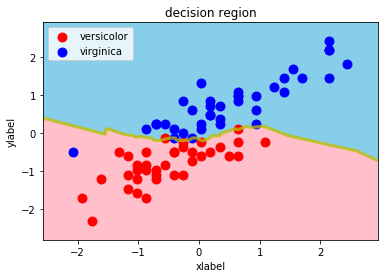

In [16]:
decision_region(X_train_std, y, knc)

# 【問題7】他の手法の学習
#### 以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。

#### 最近傍法
#### ロジスティック回帰
#### SVM
#### 決定木
#### ランダムフォレスト
#### 公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2 documentation
sklearn.svm.SVC — scikit-learn 0.20.2 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.2 documentation


In [17]:
#各モデルのセット
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

In [18]:
#各モデルの学習
lr.fit(X_train_std, y)
svc.fit(X_train_std, y)
tree.fit(X_train_std, y)
rf.fit(X_train_std, y)

C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
#各モデルと名前をリストに格納
SCORES = [accuracy_score,precision_score,recall_score,f1_score]
SCORE_NAMES = ['accuracy','precision','recall','f1']
MODELS =[knc,lr,svc,tree,rf]
MODEL_NAMES =['knc','lr','svc','tree','rf']

#各モデルの各精度指標のデータフレームを作成
scores_datas = pd.DataFrame(index=SCORE_NAMES, columns=MODEL_NAMES)



#各モデルの各スコアをデータフレームに記入してゆく
for model,model_names in zip(MODELS,MODEL_NAMES):
    for score,score_names in zip(SCORES,SCORE_NAMES):
        scores_datas.at[score_names,model_names] = score(y_test,model.predict(X_test_std))
scores_datas

,knc,lr,svc,tree,rf
accuracy,0.92,0.92,0.92,0.84,0.84
precision,1,1,1,0.909091,1
recall,0.846154,0.846154,0.846154,0.769231,0.692308
f1,0.916667,0.916667,0.916667,0.833333,0.818182


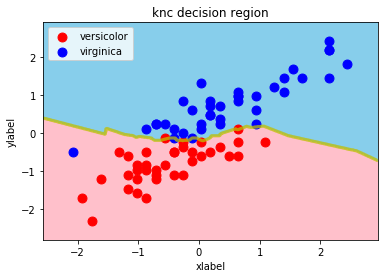

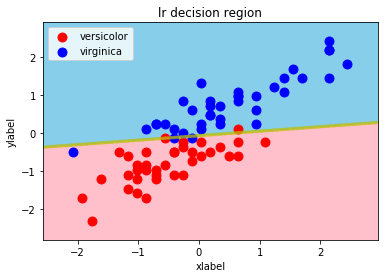

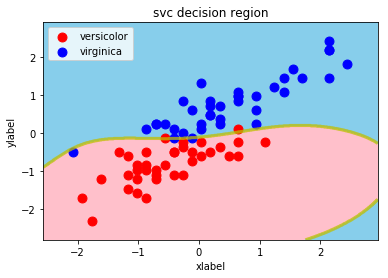

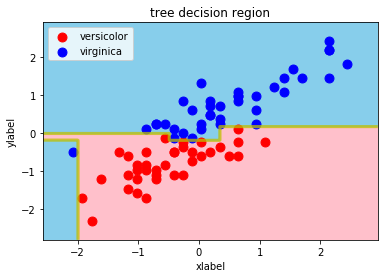

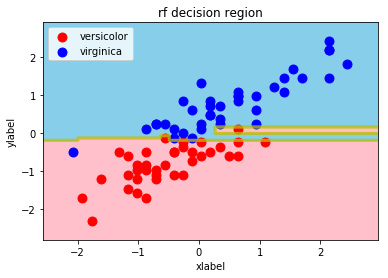

In [20]:
#各モデルの決定領域
decision_region(X_train_std, y, knc,title='knc decision region')
decision_region(X_train_std, y, lr,title='lr decision region')
decision_region(X_train_std, y, svc,title='svc decision region')
decision_region(X_train_std, y, tree,title='tree decision region')
decision_region(X_train_std, y, rf,title='rf decision region')

y_label、つまり、petal length(花びらの長さ)が境界となって、2種類の花が分類されている。
加えて、全ての指標で高い精度での分類に成功しているのは、最近傍法、ロジスティック回帰、SVMである。

# 【問題8】（アドバンス課題）各パラメータの意味
#### 手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

# 【問題9】（アドバンス課題）全ての目的変数を使用して精度が高い手法
#### ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

#### ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、
#### scikit-learnでは意識せず動作させることができます。
#### しかし、指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要があります。
#### マイクロ平均やマクロ平均という考え方を使いますので、これについて調査して説明をまとめましょう。